In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
from tqdm import tqdm
import gc
from copy import deepcopy
import pickle as pkl

import torch
import numpy as np
from torch import nn
import math
from models import *   
from drone_v34 import *
from core import generate_default_model_name

import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [3]:
bnn = create_network()
print(bnn.load_state_dict(torch.load(BMODEL_PATH, map_location=device)))
bnn.eval();

/home/rainorangelemon/anaconda3/envs/gnn/lib/python3.8/site-packages/torch/nn/modules/lazy.py:175: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/home/rainorangelemon/anaconda3/envs/gnn/lib/python3.8/site-packages/torch_geometric/nn/conv/hetero_conv.py:53: UserWarning: There exist node types ({'obstacle'}) whose representations do not get updated during message passing as they do not occur as destination type in any edge type. This may lead to unexpected behaviour.
  warnings.warn(


<All keys matched successfully>


In [4]:
import copy

collideds = []
dones = []
lengths = []
agents = []
neighbor_a = []
neighbor_o = []
for i in tqdm(range(100)):
    torch.manual_seed(i)
    random.seed(i)
    np.random.seed(i)    
    
    env = create_env(size=int((3*16)**0.5))
    collided, done, gifs = infer(env,bnn,seed=i,n_action=10000,verbose=False,
                                 spatial_prop=False,lie_derive_safe=False,
                                 decompose='random',stop_at_collision=False,need_gif=None)
    collideds.append(collided)
    dones.append(done)
    lengths.append(len(gifs))

    for gif in gifs:
        agents.append(copy.deepcopy(gif))
        env.world.agents = copy.deepcopy(gif)
        try:
            neighbor_a.append(int((env._get_obs(**OBS_CONFIG)['a_near_a'].edge_index[1,:]==1).sum()))
        except:
            neighbor_a.append(0)
        try:
            neighbor_o.append(int((env._get_obs(**OBS_CONFIG)['o_near_a'].edge_index[1,:]==1).sum()))    
        except:
            neighbor_o.append(0)
            
print(np.any(collideds, axis=-1).mean(), np.mean(collideds), np.mean(dones), np.mean(lengths))

100%|██████████| 100/100 [06:53<00:00,  4.13s/it]

0.12 0.04 0.0 257.0


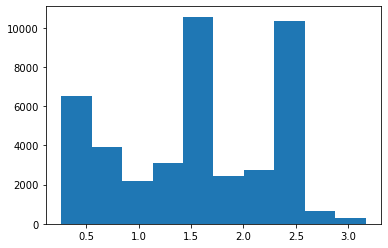

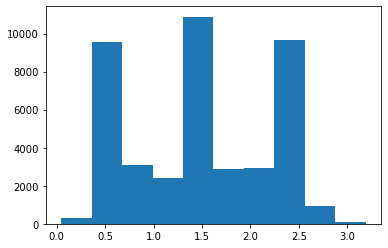

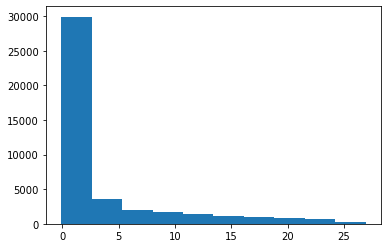

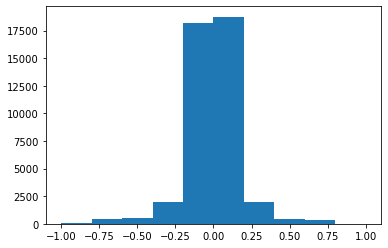

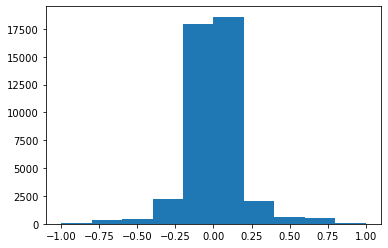

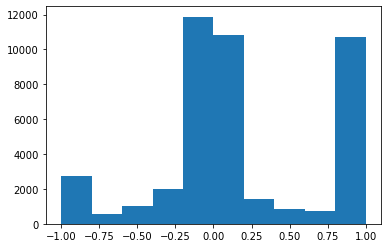

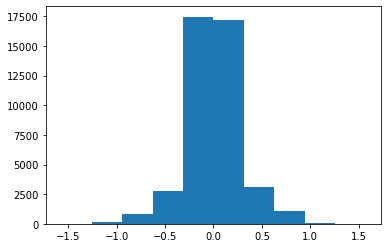

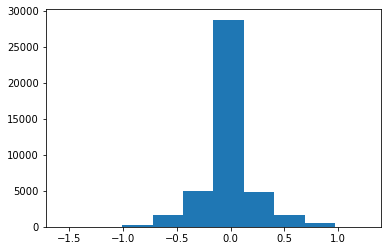

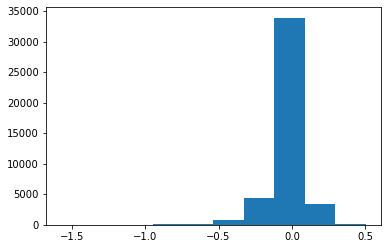

In [16]:
agents = np.array(agents).reshape(-1,9)
import matplotlib.pyplot as plt
for _ in range(9):
    plt.hist(agents[:,_])
    plt.show()

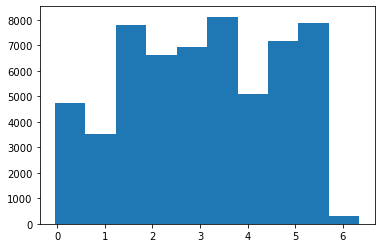

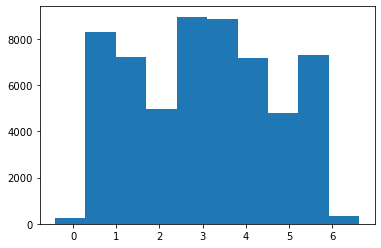

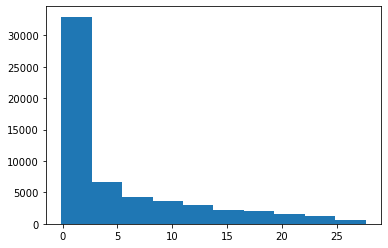

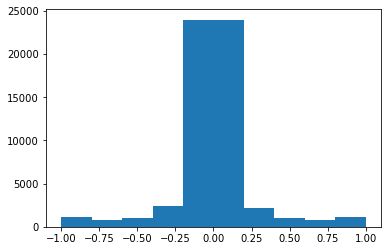

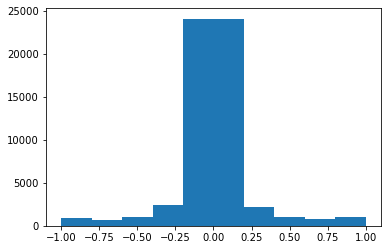

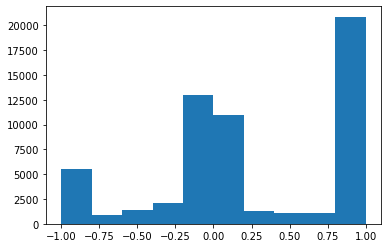

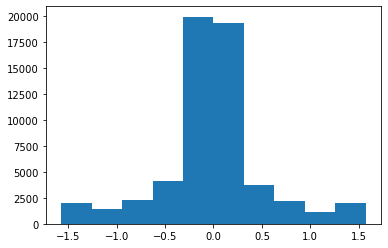

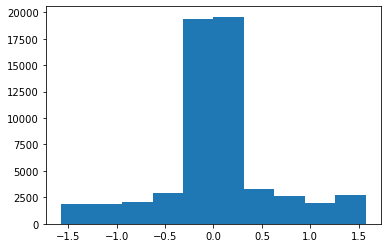

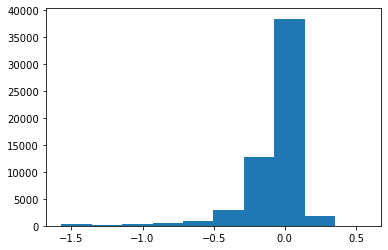

In [19]:
agents = np.array(agents).reshape(-1,9)
import matplotlib.pyplot as plt
for _ in range(9):
    plt.hist(agents[:,_])
    plt.show()

In [10]:
print(np.any(collideds, axis=-1).mean(), np.mean(collideds), np.mean(dones), np.mean(lengths))

0.03 0.013333333333333334 0.7 137.69


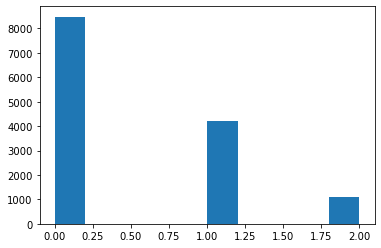

In [5]:
import matplotlib.pyplot as plt
plt.hist(neighbor_a)
plt.show()

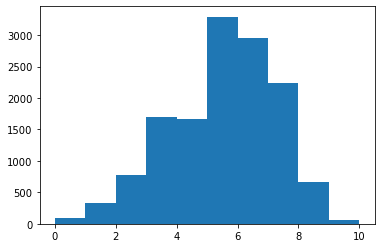

In [6]:
import matplotlib.pyplot as plt
plt.hist(neighbor_o)
plt.show()

In [7]:
OBS_CONFIG_DECOMPOSE

{'share_weight': True,
 'rgraph_a': True,
 'rgraph_o': True,
 'n_sub_o': (1, 9),
 'n_sub_a': (0, 2),
 'has_goal': False,
 'iteration': 1}